In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [2]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    
    w_star = np.linalg.solve(np.dot(tx.T, tx), np.dot(tx.T, y))
    mse = (1/len(y))*np.transpose(y - tx@w_star).dot((y - tx@w_star))
    
    return mse, w_star
    

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [3]:
from helpers import *
from grid_search import grid_search, get_best_parameters, generate_w
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    

In [4]:
from helpers import *
from grid_search import grid_search, get_best_parameters, generate_w

def test_your_least_squares():
    
    # Load and build model
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    
    
    # Grid Search
    grid_w0, grid_w1 = generate_w(num_intervals=100)
    grid_losses = grid_search(y, tx, grid_w0, grid_w1)
    loss_star_grid, w0_star_grid, w1_star_grid = get_best_parameters(grid_w0, grid_w1, grid_losses)
    
    # Least Squares
    mse_lsq, w_star_lsg =  least_squares(y, tx)
    

    print("Loss from gridsearch:", loss_star_grid, "Loss from least squares:", mse_lsq)
    print('Weights from gridsearch:', w0_star_grid, w1_star_grid, 'Weights from least squares:', w_star_lsg)
    

Test it here

In [5]:
test_your_least_squares()

Loss from gridsearch: 15.55870336860953 Loss from least squares: 30.771775737658796
Weights from gridsearch: 72.72727272727272 13.636363636363626 Weights from least squares: [73.293922   13.47971243]


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [6]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [16]:

 ## This is not being used, change source in build_polynomial.py
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""

    feature_matrix = np.ones([len(x), degree])

    print("Building Poly")
    
    for deg in range(1, degree+1):
        feature_matrix = np.c_[feature_matrix, np.power(x, deg)]
    

    return feature_matrix



Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [17]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        
        tx = build_poly(x, degree)
        # ***************************************************
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        
        loss, weights = least_squares(y, tx)
        
        rmse = np.sqrt(2*loss)
        # ***************************************************

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.8872641480141742
Processing 2th experiment, degree=3, rmse=0.3677545067554237
Processing 3th experiment, degree=7, rmse=0.35601895751637913
Processing 4th experiment, degree=12, rmse=0.3466278768846354


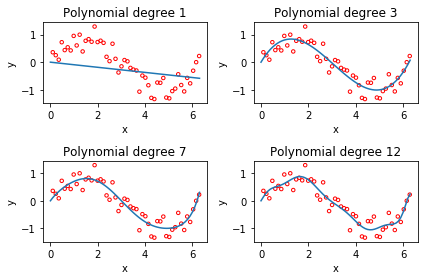

In [18]:
polynomial_regression()


## 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [19]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    num_rows = len(y)
    indicies = np.random.permutation(num_rows)
    split = int(np.floor(num_rows*ratio))
    ind_tr = indicies[: split]
    ind_te = indicies[split :]
    y_tr = y[ind_tr]
    y_te = y[ind_te]
    x_tr = x[ind_tr]
    x_te = x[ind_te]
    return y_tr, x_tr, y_te, x_te
    
    # ***************************************************

Then, test your `split_data` function below.

In [20]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    
    # split the data, and return train and test data
    y_tr, x_tr, y_te, x_te = split_data(x, y, ratio, seed)
    
    # form train and test data with polynomial basis function
    
    tx_tr = build_poly(x_tr, degree)
    tx_te = build_poly(x_te, degree)
    
    # calcualte weight through least square
    loss_tr, weights = least_squares(y_tr, tx_tr)
    loss_te = (1/len(y_te))*np.transpose(y_te - tx_te @ weights).dot((y_te - tx_te @ weights))
    
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    rmse_tr = np.sqrt(2*loss_tr)
    rmse_te = np.sqrt(2*loss_te)
    
    
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))
    
    return weights, y_te, x_te


proportion=0.9, degree=1, Training RMSE=0.919, Testing RMSE=0.519
proportion=0.9, degree=3, Training RMSE=0.376, Testing RMSE=0.295
proportion=0.9, degree=7, Training RMSE=0.361, Testing RMSE=0.320
proportion=0.9, degree=12, Training RMSE=0.350, Testing RMSE=0.366
proportion=0.5, degree=1, Training RMSE=0.989, Testing RMSE=0.783
proportion=0.5, degree=3, Training RMSE=0.338, Testing RMSE=0.421
proportion=0.5, degree=7, Training RMSE=0.331, Testing RMSE=0.411
proportion=0.5, degree=12, Training RMSE=0.308, Testing RMSE=1.393
proportion=0.1, degree=1, Training RMSE=0.805, Testing RMSE=1.012
proportion=0.1, degree=3, Training RMSE=0.158, Testing RMSE=0.635
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=3.017
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=3.160


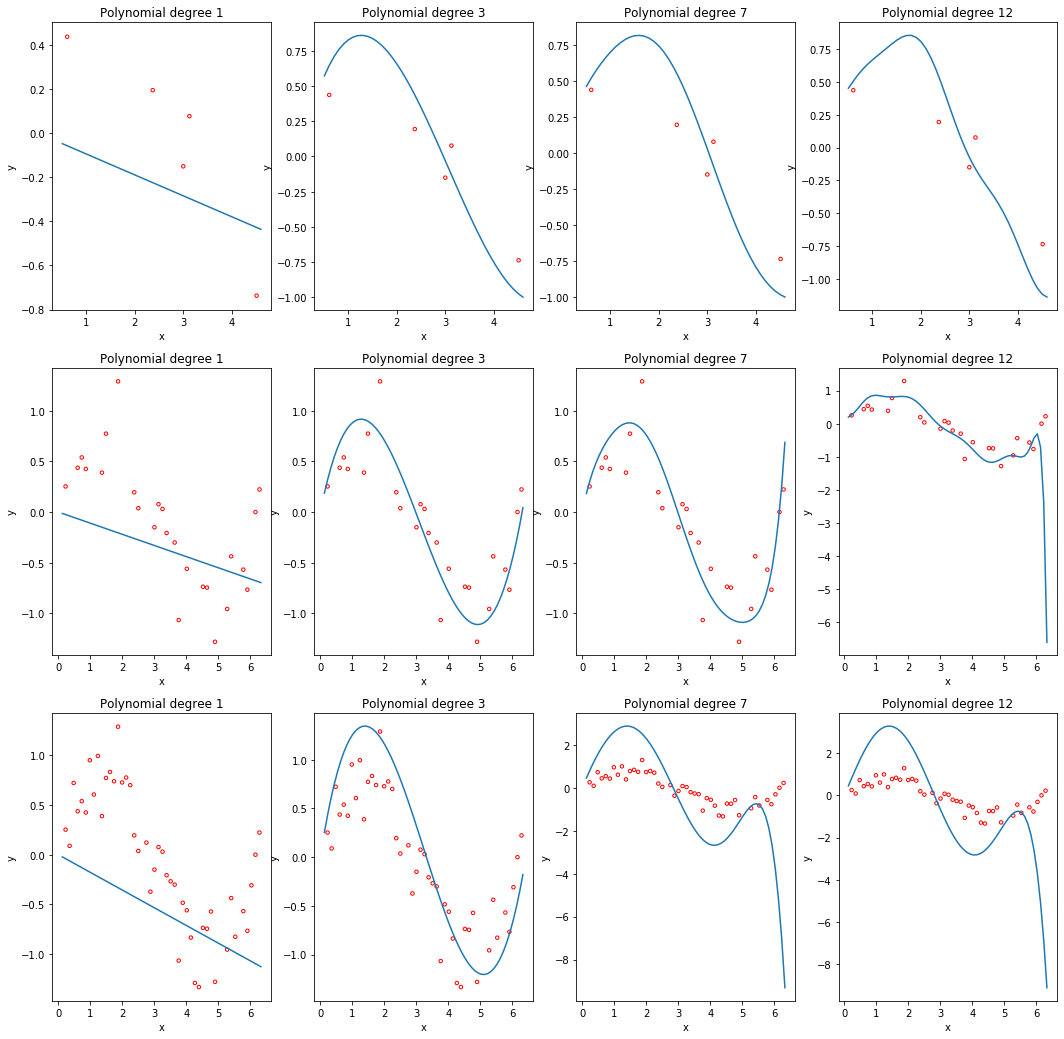

In [21]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

num_row = 3
num_col = 4
f, axs = plt.subplots(num_row, num_col, figsize=(18,18))

ind = 0

for split_ratio in split_ratios:
    for degree in degrees:
        weights, y_te, x_te = train_test_split_demo(x, y, degree, split_ratio, seed)
        plot_fitted_curve(
            y_te, x_te, weights, degree, axs[ind // num_col][ind % num_col])
        
        ind += 1
plt.savefig("visualize_polynomial_regression_2")
plt.show()

## Theory Questions

- We observe that a polynomial of third degree seem to fit well with the datapoints, and therefore we have a low difference between test and training RMSE.
- For higher order polynomials, we see that the training RMSE is low, but the test score is low. This is because the model overfits.
- If the split is 10 to 90, we get way to little data to train our model and it overfits easily.

# 3 Ridge Regression
Please fill in the function below.

In [49]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    aI = 2 * tx.shape[0] * lambda_ * np.identity(tx.shape[1])
    a = tx.T.dot(tx) + aI
    b = tx.T.dot(y)
    w_ridge = np.linalg.solve(a, b)
    loss_ridge = (1/len(y))*np.transpose(y - tx@w_ridge).dot((y - tx@w_ridge))
    return loss_ridge, w_ridge


In [63]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    
    # split the data, and return train and test data
    y_tr, x_tr, y_te, x_te = split_data(x, y, ratio, seed)
    
    # form train and test data with polynomial basis function
    
    tx_tr = build_poly(x_tr, degree)
    tx_te = build_poly(x_te, degree)

    rmse_tr = []
    rmse_te = []
    
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        loss_tr, weights = ridge_regression(y_tr, tx_tr, lambda_)
        loss_te = (1/len(y_te))*np.transpose(y_te - tx_te @ weights).dot((y_te - tx_te @ weights))

        
        rmse_tr.append(np.sqrt(2*loss_tr))
        rmse_te.append(np.sqrt(2*loss_te))
        
        # ***************************************************
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)



proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.321, Testing RMSE=0.479
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.321, Testing RMSE=0.478
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.322, Testing RMSE=0.476
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.322, Testing RMSE=0.471
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.322, Testing RMSE=0.460
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.324, Testing RMSE=0.440
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.328, Testing RMSE=0.412
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.338, Testing RMSE=0.386
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.351, Testing RMSE=0.374
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.364, Testing RMSE=0.383
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.381, Testing RMSE=0.415
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.407, Testing RMSE=0.475
proportion=0.5, degree=7, lambda=0.193, 

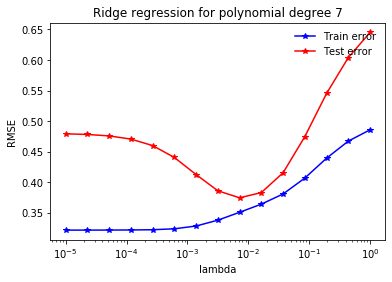

In [62]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)